# Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gmean
import seaborn as sns
from sklearn.decomposition import PCA

# importing data
untidy = pd.read_csv("smallerdataset.csv")
untidy = untidy[1:]

In [2]:
# transposing to wide data format rather than long
untidy = untidy.transpose()

In [3]:
# Creating a list of housekeeping genes
class_name = untidy.loc["Class Name"]
housekeeping_indices = class_name.index[class_name == "Housekeeping"]
housekeeping_genes = list(untidy.loc["Probe Name"][housekeeping_indices])

In [4]:
# Creating lists of negative and positive controls, respectively
neg_indices = class_name.index[class_name == "Negative"]
negative_controls = list(untidy.loc["Probe Name"][neg_indices])

pos_indices = class_name.index[class_name == "Positive"]
positive_controls = list(untidy.loc["Probe Name"][pos_indices])

In [5]:
# Reformatting aspects of the dataframe
# first, setting column names to the gene names
new_header = untidy.iloc[0]
untidy.columns = new_header

# second, removing non-sample rows
untidy = untidy[3:]

# reformatting sample names to match annotations (to make merging the two tables easier)
untidy.index = untidy.index.str.replace(" ",".")

In [6]:
# making sure all values are numeric
untidy = untidy.apply(pd.to_numeric)

# QC

I exported imaging QC, binding density QC, positive linearity QC, limit of detection QC metrics from the nSolver software.

In [7]:
qctable = pd.read_csv("initQC.csv")

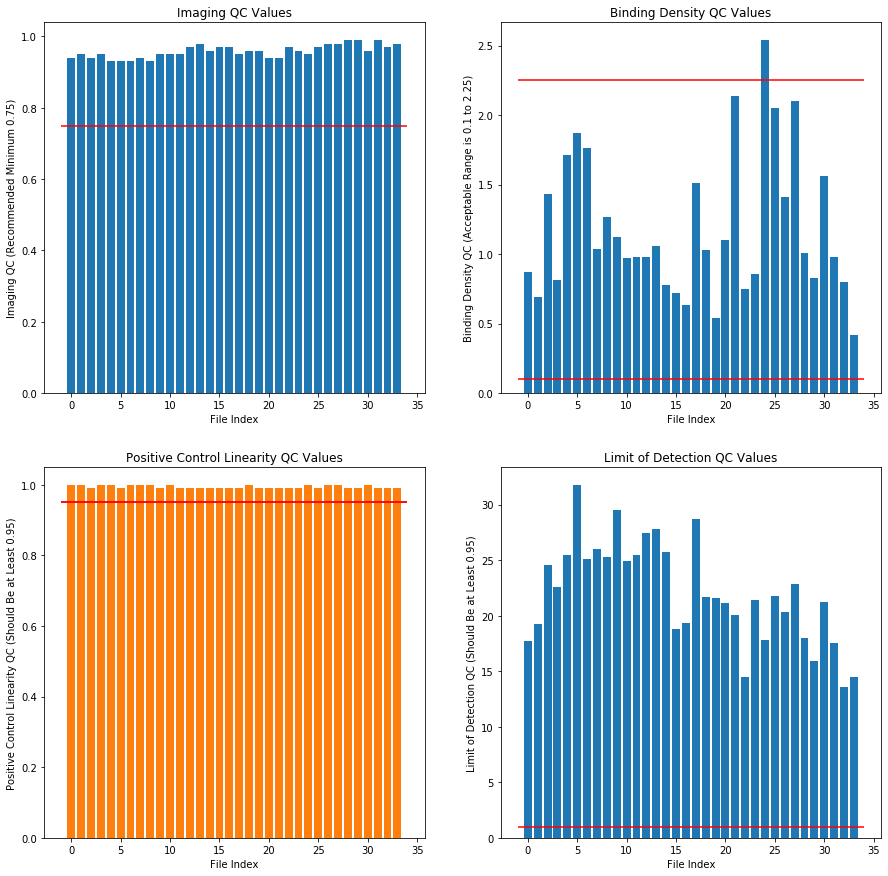

In [8]:
f, ax = plt.subplots(2,2,figsize=(15,15))

indices = range(len(qctable["File Name"]))

# creating top-left plot for imaging QC
ax[0, 0].bar(indices, qctable["Imaging QC"])
ax[0, 0].set_title("Imaging QC Values")
ax[0, 0].set_xlabel("File Index")
ax[0, 0].set_ylabel("Imaging QC (Recommended Minimum 0.75)")
ax[0, 0].hlines(0.75, -1, len(indices), color ="red")

ax[0, 1].bar(indices, qctable["Binding Density QC"])
ax[0, 1].set_title("Binding Density QC Values")
ax[0, 1].set_xlabel("File Index")
ax[0, 1].set_ylabel("Binding Density QC (Acceptable Range is 0.1 to 2.25)")
ax[0, 1].hlines([0.1, 2.25],-1, len(indices), color ="red")

# Creating bottom-left plot for Positive Control Linearity QC
ax[1, 0].bar(indices, qctable["Positive Control Linearity QC"])
ax[1, 0].set_title("Positive Control Linearity QC Values")
ax[1, 0].set_xlabel("File Index")
ax[1, 0].set_ylabel("Positive Control Linearity QC (Should Be at Least 0.95)")
ax[1, 0].hlines(0.95, -1, len(indices), color ="red")

# Creating bottom-left plot for Positive Control Linearity QC
ax[1, 0].bar(indices, qctable["Positive Control Linearity QC"])
ax[1, 0].set_title("Positive Control Linearity QC Values")
ax[1, 0].set_xlabel("File Index")
ax[1, 0].set_ylabel("Positive Control Linearity QC (Should Be at Least 0.95)")
ax[1, 0].hlines(0.95, -1, len(indices), color ="red")

# Creating bottom-left plot for Positive Control Linearity QC
ax[1, 1].bar(indices, qctable["Limit of Detection QC of mRNA"])
ax[1, 1].set_title("Limit of Detection QC Values")
ax[1, 1].set_xlabel("File Index")
ax[1, 1].set_ylabel("Limit of Detection QC (Should Be at Least 0.95)")
ax[1, 1].hlines(0.95, -1, len(indices), color ="red")

plt.show()

# Data Normalization

#### First, positive control normalization

In [9]:
pos = untidy[positive_controls].astype("float64")
pos["Geometric Mean"] = gmean(pos, axis=1)
pos_normfactors = list(np.mean(pos["Geometric Mean"])/pos["Geometric Mean"])

In [10]:
positivecontrol_normalized = np.multiply(pos_normfactors, untidy.T.astype("float64")).T

#### Codeset (Housekeeping Gene) Normalization

***Now we should check if the normalization process actually worked by evaluating its effect on the housekeeping genes***

In [11]:
np.multiply(pos_normfactors, untidy[housekeeping_genes].T.astype("float64")).T

Probe Name,ABCF1,AGK,ALAS1,AMMECR1L,CC2D1B,CNOT10,CNOT4,COG7,DDX50,DHX16,...,TBP,TLK2,TMUB2,TRIM39,TUBB,USP39,ZC3H14,ZKSCAN5,ZNF143,ZNF346
20190605_208512911220_OnCode.1_01.RCC,1186.563452,296.090509,734.172377,1063.284132,90.258073,551.454814,638.410763,536.044899,509.627902,560.260480,...,702.251839,963.119685,804.617703,321.406798,5336.233410,523.937109,1068.787673,169.509065,442.484701,168.408356
20190605_208512911220_Oncode.11_03.RCC,540.822929,301.326813,406.986864,907.893774,68.092033,435.945545,545.518931,434.380211,446.902883,366.288178,...,510.298914,500.124243,454.729554,104.877384,1841.615560,425.770873,723.967018,137.749400,370.201513,133.053398
20190605_208512911220_Oncode.12_04.RCC,1387.320529,736.263021,820.376155,884.826479,98.314053,722.062102,871.717938,888.103614,718.784967,879.364587,...,1473.618420,1175.399125,852.055128,223.937566,7904.449878,1411.352853,1673.523661,159.487242,517.787347,185.704323
20190605_208512911220_Oncode.14_05.RCC,1202.349794,273.223338,458.714411,908.237823,73.527993,315.836152,632.507849,762.852927,583.210672,541.433403,...,464.563228,770.372836,489.629590,270.716701,6630.052550,712.720205,629.165667,142.878259,468.740955,138.700532
20190605_208512911220_Oncode.16_06.RCC,3680.765012,428.513616,1438.024916,2030.152822,223.717498,938.277867,1164.221410,1385.712864,1489.223945,2389.659051,...,1332.287789,2298.391216,1884.346890,724.577570,18324.800472,878.174658,1130.830739,297.176976,970.555516,379.540632
20190605_208512911220_Oncode.21_07.RCC,2156.005890,674.626212,2468.447984,2508.863379,147.671636,1523.349512,1005.721565,1919.731272,1310.391468,1159.610955,...,1627.496876,2336.320731,1414.538832,346.639736,8286.710456,1509.359567,2420.260398,275.135575,893.802009,439.906032
20190605_208512911220_Oncode.23_08.RCC,2849.967517,568.477563,2747.100148,1446.640047,127.772100,1207.338063,1365.428966,1547.341786,1184.598960,2010.786352,...,1099.056622,1607.979393,1600.399692,454.782051,10978.655263,1094.725365,2312.891571,280.448931,866.251525,382.233485
20190605_208512911220_Oncode.24._09.RCC,826.376853,186.955980,1320.474800,658.273576,76.981874,435.968777,373.911960,798.097797,316.568319,537.302060,...,399.834428,666.914399,675.555222,135.111044,2151.564828,484.671595,644.134049,143.751867,296.930086,135.896574
20190605_208512911220_Oncode.26_10.RCC,1517.408368,385.295480,1365.749509,789.445845,87.716205,510.721455,568.925666,756.654740,462.354576,630.408987,...,588.600329,617.292545,450.877689,227.078400,5533.498911,664.839647,855.028054,126.245753,477.930350,141.821528
20190605_208512911220_Oncode.27_11.RCC,721.957956,320.779969,596.082272,330.525183,32.484048,391.432773,395.493278,455.588766,290.732225,355.700320,...,345.143005,510.811647,277.738606,135.620898,4633.849378,421.480517,545.731998,72.277006,319.155767,90.955333


In [12]:
hkg_table = untidy[housekeeping_genes]

# converting housekeeping gene expression values into TPM
hkg_table = (hkg_table.T / hkg_table.T.sum()).T
hkg_table = hkg_table*(10**6)

"We used TPM-generated data to calculate the coefficient of variation (CV, calculated as the standard deviation divided by the mean), for target gene expression levels across the analyzed samples. We initially evaluated the gene expression variability of commonly used reference genes (Table 1) [18], and found all 12 analyzed genes to exhibit a CV-value greater than 45%"

Jo, J., Choi, S., Oh, J. et al. Conventionally used reference genes are not outstanding for normalization of gene expression in human cancer research. BMC Bioinformatics 20, 245 (2019). https://doi.org/10.1186/s12859-019-2809-2

In [13]:
hkg_cv = np.std(hkg_table, axis = 0)/np.mean(hkg_table, axis = 0)
pd.DataFrame(data = hkg_cv, columns = ["Coefficient of Variation"])

,Coefficient of Variation
Probe Name,
ABCF1,0.212383
AGK,0.247204
ALAS1,0.408266
AMMECR1L,0.263885
CC2D1B,0.347981
CNOT10,0.232614
CNOT4,0.183247
COG7,0.326335
DDX50,0.185501


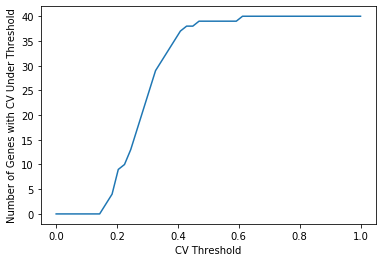

In [14]:
x = np.linspace(0, 1, 50)
num_under = []
for i in x:
    num_under.append(len(hkg_cv[hkg_cv < i].index))
    
plt.plot(x, num_under)
plt.xlabel("CV Threshold")
plt.ylabel("Number of Genes with CV Under Threshold")
plt.show()

In [15]:
# Choosing housekeeping genes with CV under threshold
threshold = 0.45
filtered_hkg = hkg_cv[hkg_cv < threshold].index
filtered_hkg

Index(['ABCF1', 'AGK', 'ALAS1', 'AMMECR1L', 'CC2D1B', 'CNOT10', 'CNOT4',
       'COG7', 'DDX50', 'DHX16', 'DNAJC14', 'EDC3', 'EIF2B4', 'ERCC3', 'FCF1',
       'GPATCH3', 'GUSB', 'HDAC3', 'HPRT1', 'MRPS5', 'MTMR14', 'NOL7', 'NUBP1',
       'POLR2A', 'PPIA', 'PRPF38A', 'SAP130', 'SDHA', 'SF3A3', 'TBP', 'TMUB2',
       'TRIM39', 'TUBB', 'USP39', 'ZC3H14', 'ZKSCAN5', 'ZNF143', 'ZNF346'],
      dtype='object', name='Probe Name')

In [16]:
filt_house = untidy[filtered_hkg].astype("float64")
filt_house["Geometric Mean"] = gmean(filt_house, axis=1)
hkg_normfactors = list(np.mean(filt_house["Geometric Mean"])/filt_house["Geometric Mean"])

In [17]:
normalized_counts = np.multiply(hkg_normfactors, positivecontrol_normalized.T.astype("float64")).T

In [18]:
# converting into TPM
normalized_tpm = ((normalized_counts.T / normalized_counts.T.sum()).T)*(10**6)

# Data Analysis

#### Cluster Map for All Genes, All Samples

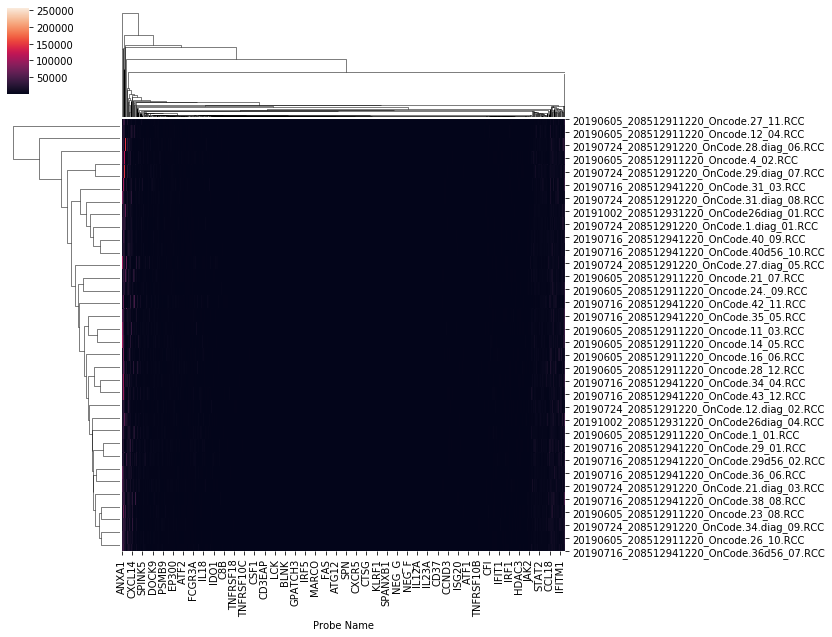

In [19]:
%matplotlib inline
sns.clustermap(normalized_tpm)

#### Heat Map for All Genes, All Samples

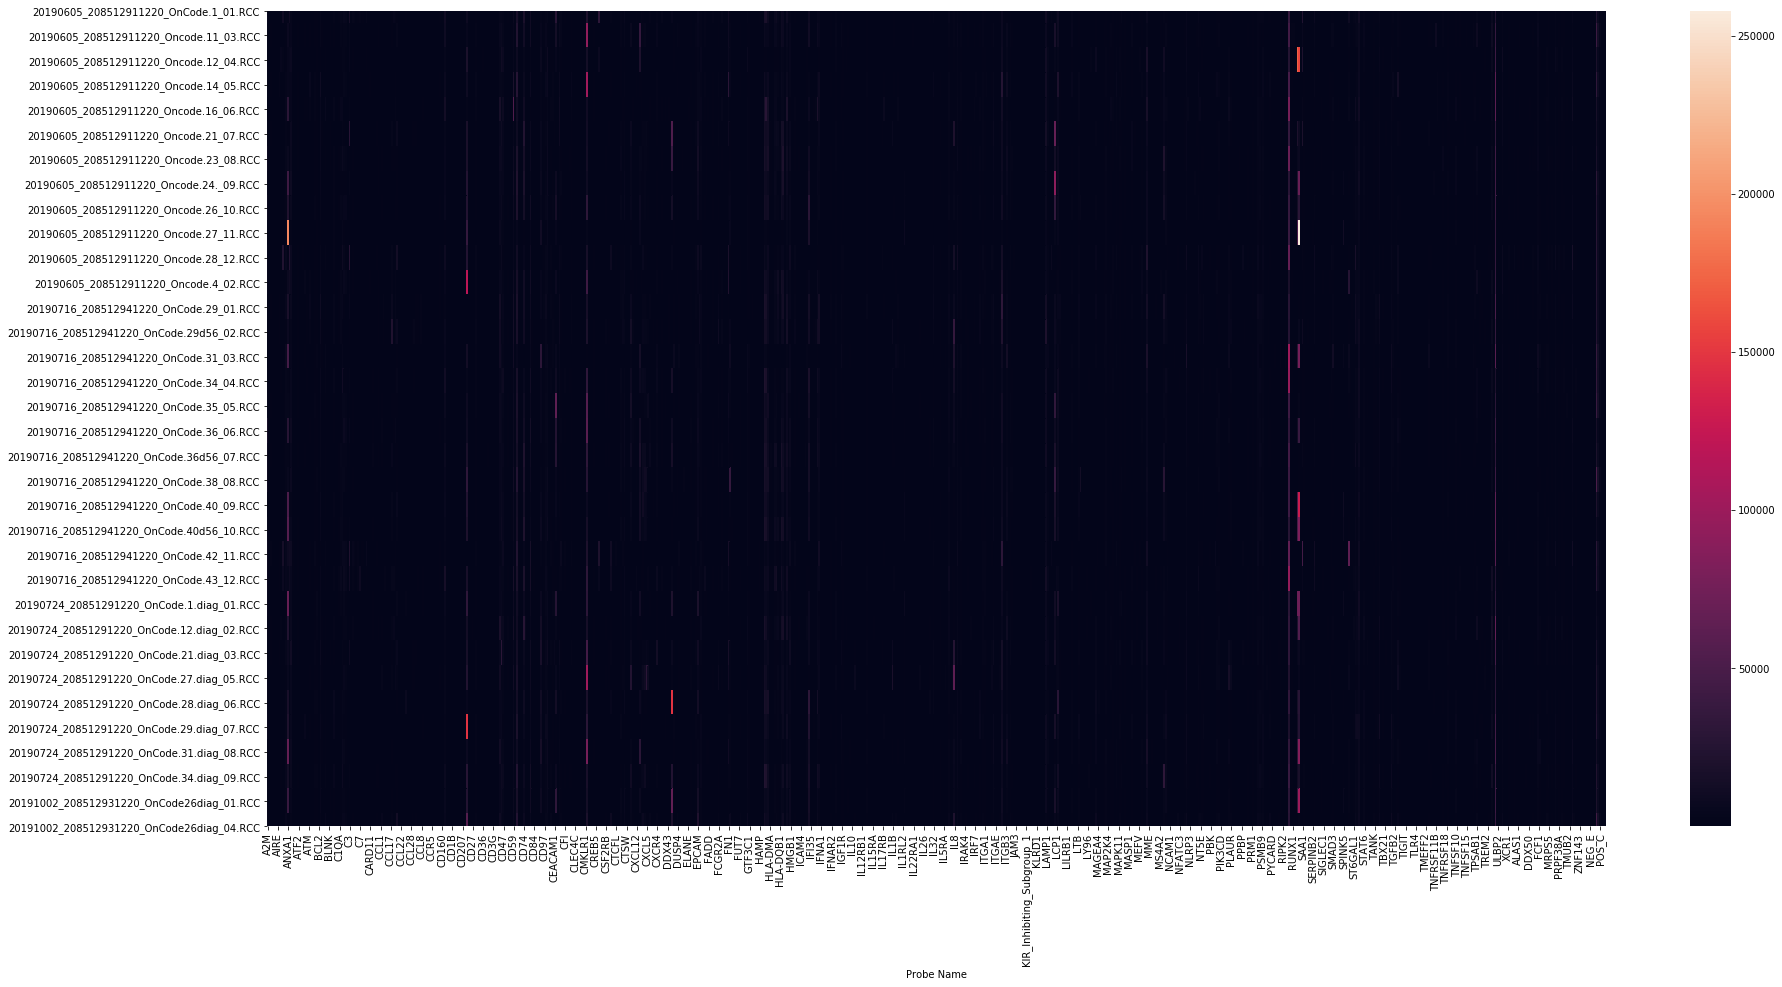

In [20]:
plt.subplots(figsize = (30, 15))
sns.heatmap(normalized_tpm)
plt.show()

#### Determining the "most important" genes via SVD

[ 0.4498746   0.54844988  0.63797261  0.71242138  0.78035936  0.8239263
  0.85257871  0.87732281  0.89872367  0.91801496  0.93092759  0.94079184
  0.94933914  0.95688272  0.96381204  0.9693557   0.97402942  0.97772076
  0.98125768  0.98421103  0.98684446  0.98913922  0.99129122  0.99287449
  0.99441577  0.99569704  0.99673927  0.99765643  0.99829412  0.99890504
  0.9994209   0.99976473  1.          1.        ]


Text(0, 0.5, 'Explained Variance')

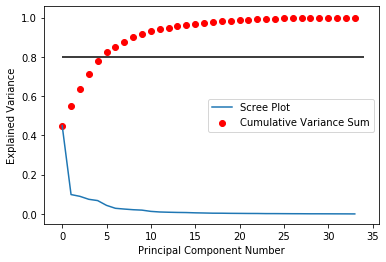

In [21]:
# First, we'll make a scree plot to determine an appropriate number of principal components to use
num = PCA(n_components = 770)
num.fit(normalized_tpm)
print(np.cumsum(num.explained_variance_ratio_))


plt.plot(range(len(num.explained_variance_ratio_)), num.explained_variance_ratio_)
plt.scatter(range(len(num.explained_variance_ratio_)), np.cumsum(num.explained_variance_ratio_), c = "red")
plt.legend(["Scree Plot", "Cumulative Variance Sum"])
plt.hlines([0.8], 0, 34)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance")

Using an admittedly arbitrary cutoff of 0.8 leads us to use 5 principal components.

In [22]:
# defining a function to perform SVD and output useful results
# parameters are data and n (number of principal components to output)
def decompose(data, n):
    
    # Centering the data about the origin
    x_star = data - data.mean(axis=0, keepdims=True)
    
    # Performing SVD
    u, s, vh = np.linalg.svd(x_star)
    
    # converting SVD result vh (=v_transpose) to v
    v = vh.T
    
    # Projecting the centered data into PCA space using matrix multiplicatin
    pca_space_data = x_star @ v
    
    # returning the first n columns of the projected data (first n principal components)
    # as well as SVD result matrices s, u, and v
    return [pca_space_data[:,:n], s, v, u]

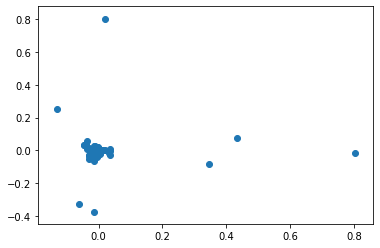

In [23]:
# w is the transpose of the matrix of eigenvectors
w = decompose(np.array(normalized_tpm), 2)[2]
firsttwo = w[:, :2]
# plotting just 2 principal components: see that a few genes are outside of the central cluster
plt.scatter(w.T[0], w.T[1])

In [24]:
v_t = decompose(np.array(normalized_tpm), 5)[2]
firstfive = v_t[:, :5]
euc_distances = []

for i in range(len(v_t)):
    euc_distances.append(np.linalg.norm(firstfive[i]))

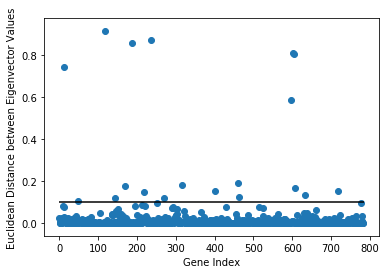

In [25]:
thresh = 0.1

plt.scatter(range(len(euc_distances)), euc_distances)
plt.xlabel("Gene Index")
plt.ylabel("Euclidean Distance between Eigenvector Values")
plt.hlines(thresh, 0, len(euc_distances))

Setting a threshold of 0.1, we'll classify only the genes with a Euclidean distance from 0 above 0.1 as "relevant" (i.e., contributing to the variance)

In [26]:
relevant_genes = np.where(np.array(euc_distances) > 0.1)[0]
relevant_genes = list(relevant_genes)
relevant_gene_data = normalized_tpm.iloc[:,relevant_genes]

In [59]:
def find_relevant(data, pc, threshold):
    v_transp = decompose(np.array(data), pc)[2]
    firstfew = v_transp[:, :pc]
    agg = []

    for i in range(len(v_transp)):
        agg.append(np.linalg.norm(firstfew[i]))
        
    relevance = list(np.where(np.array(euc_distances) > threshold)[0])
    return relevance

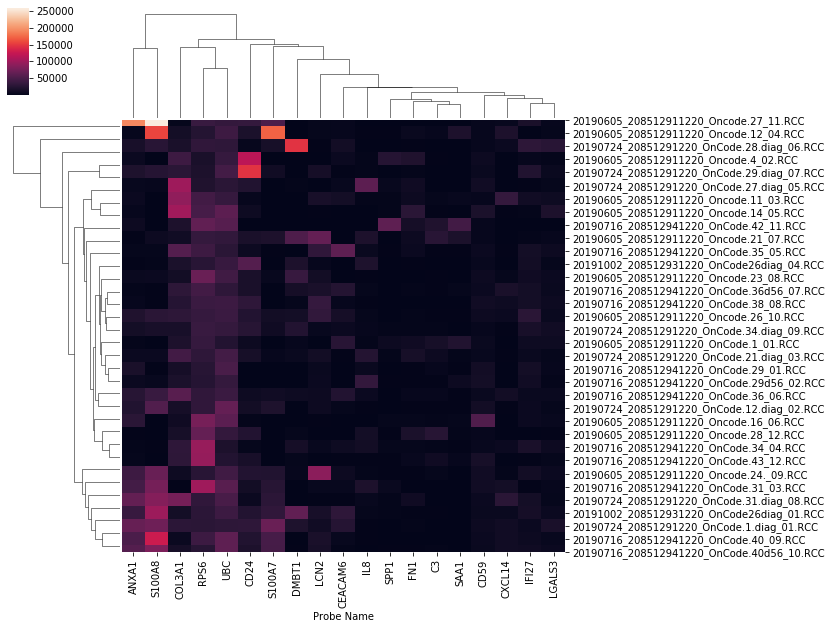

In [28]:
sns.clustermap(relevant_gene_data)

In [29]:
annotations = pd.read_csv("nanostring annotations project 1.csv")
annotations["FileName"] = annotations["FileName"].str[1:]
annotations = annotations.rename(columns = {'HER (another marker identified primarily with breast cancer--herceptin)':'HER'})
annotations = annotations.set_index("FileName")

In [30]:
relevant_annotated = relevant_gene_data.merge(annotations, left_index = True, right_index = True)
relevant_annotated.columns

Index(['ANXA1', 'C3', 'CD24', 'CD59', 'CEACAM6', 'COL3A1', 'CXCL14', 'DMBT1',
       'FN1', 'IFI27', 'IL8', 'LCN2', 'LGALS3', 'RPS6', 'S100A7', 'S100A8',
       'SAA1', 'SPP1', 'UBC', 'ID', 'PatientID', 'Day', 'BOR ',
       'Anatomical_Location', 'Histology', 'PD1_CPS', 'PD1_Score', 'HER',
       'PriorRadiation'],
      dtype='object')

In [31]:
standard_rgd = (relevant_gene_data - relevant_gene_data.mean())/relevant_gene_data.std()

pca = PCA(n_components = 2)
components = pca.fit_transform(standard_rgd)
comptable = pd.DataFrame(data = components, columns = ["PC 1", "PC 2"])

comptable["ID"] = list(relevant_annotated["PatientID"])
comptable["Response"] = list(relevant_annotated["BOR "])

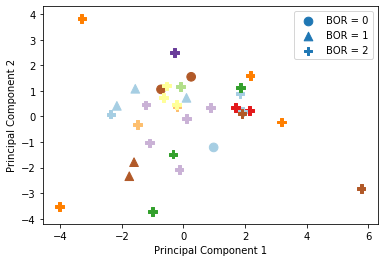

In [55]:
def plot_differentiated(comptable):
    sub1 = comptable[(comptable['Response'] == 0)]
    sub2 = comptable[(comptable['Response'] == 1)]
    sub3 = comptable[(comptable['Response'] == 2)]

    colors = "Paired"

    plt.scatter(sub1["PC 1"], sub1["PC 2"], c = sub1["ID"], cmap = colors, marker = "o", s = 75)
    plt.scatter(sub2["PC 1"], sub2["PC 2"], c = sub2["ID"], cmap = colors, marker = "^", s = 75)
    plt.scatter(sub3["PC 1"], sub3["PC 2"], c = sub3["ID"], cmap = colors, marker = "P", s = 75)

#plt.scatter(row[0], row[1], c = row[2], cmap = "cividis", marker = "^")

#plt.scatter(row[0], row[1], c = row[2], cmap = "cividis", marker = "p")

plot_differentiated(comptable)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(["BOR = 0", "BOR = 1", "BOR = 2"])
plt.show()


### Checking that I chose the correct relevant genes

In [73]:
checker = decompose(np.array(relevant_gene_data), 5)[2][:, :5]

agg = []

for i in range(len(checker)):
    agg.append(np.linalg.norm(checker[i]))

min(agg)
# ok we're good

0.10237128313119176

#### Narrowing down the dataset

First, let's just look at patients for whom we have more than one sample.

In [57]:
relevant_annotated

,ANXA1,C3,CD24,CD59,CEACAM6,COL3A1,CXCL14,DMBT1,FN1,IFI27,...,ID,PatientID,Day,BOR,Anatomical_Location,Histology,PD1_CPS,PD1_Score,HER,PriorRadiation
20190605_208512911220_OnCode.1_01.RCC,2443.103166,15129.759161,8414.763169,6302.956446,27535.062901,19839.496030,507.765905,4903.686797,10767.134394,9424.468157,...,1_01,1,0,2,1,0,0,1,1,1
20190605_208512911220_Oncode.11_03.RCC,7400.284642,3561.046805,4532.699542,4961.073414,13608.178010,93409.694756,36092.262661,287.262479,8889.009842,11896.698397,...,11_03,11,0,2,2,0,0,0,0,1
20190605_208512911220_Oncode.12_04.RCC,4994.578701,4126.342304,18175.555387,4271.344293,4705.166569,13976.416166,19632.085567,28.408553,6511.477055,294.146891,...,12_04,12,0,2,1,0,0,0,0,0
20190605_208512911220_Oncode.14_05.RCC,4520.838938,1563.064795,9673.836078,18378.803059,33.010872,103640.934142,1665.398499,10.728533,28619.600866,2701.939884,...,14_05,14,0,2,2,0,0,0,0,1
20190605_208512911220_Oncode.16_06.RCC,28533.126375,2236.248683,2937.897352,53905.609790,25.791597,10173.612617,417.941104,47.479985,3325.357477,7714.618325,...,16_06,16,0,0,2,0,1,3,0,0
20190605_208512911220_Oncode.21_07.RCC,1559.725840,27965.788549,17319.209243,4672.418144,184.192976,11609.226998,228.128915,52565.408221,8544.976883,2850.766513,...,21_07,21,0,2,0,0,0,1,0,0
20190605_208512911220_Oncode.23_08.RCC,6807.429417,1672.537398,17740.451082,8307.802344,685.191487,12852.828841,3808.416763,37486.213843,974.058049,10538.429941,...,23_08,23,0,2,0,0,0,1,0,0
20190605_208512911220_Oncode.24._09.RCC,42134.392710,3073.803707,23630.418574,11718.324055,9015.115570,9152.891527,2873.402315,4363.150899,1094.839959,13015.775715,...,24_09,24,0,2,2,0,2,0,0,1
20190605_208512911220_Oncode.26_10.RCC,21565.666758,1734.467496,23877.641202,8355.033103,15000.905193,30337.283524,8058.493018,13969.179298,2198.419707,28742.326133,...,26_10,26,0,1,0,0,0,2,0,1
20190605_208512911220_Oncode.27_11.RCC,193878.366446,150.653311,35372.087478,4635.536889,4923.088209,3402.144779,5411.728950,188.644146,224.014924,17948.049498,...,27_11,27,0,2,0,0,0,0,0,0
